In [1]:
# 변수의 shape, type, value 확인
def p(var,_str='') :
    if _str=='\n' or _str=='cr' :
        _str = '\n'
    else :
        print(f'[{_str}]:')
        _str = ''
    if type(var)!=type([]):
        try: 
            print(f'Shape:{var.shape}')
        except : 
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}'+_str)

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}') 

In [2]:
%%capture
!pip install pytorch_lightning torchinfo torchmetrics torchviz 

# CNN model handling

# 실습 : VGG Model Feature Maps

### Import Module

In [3]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.core.lightning import LightningModule
from torchmetrics import functional as FM
from torchinfo import summary
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import CSVLogger
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

device ='cuda:0'
torch.__version__

'1.12.0+cu113'

**Github에서 가져오기**  
https://github.com/pytorch/vision 

In [ ]:
torch.hub.list('pytorch/vision:v0.12.0')
#torch.hub.help('pytorch/vision:v0.12.0','vgg16')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.12.0


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'fcn_resnet101',
 'fcn_resnet50',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'raft_large',
 'raft_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
summary(model, input_size=(8, 3, 224, 224))

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [8, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [8, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [8, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [8, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [8, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [8, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [8, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [8, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [8, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [8, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [8, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [8, 256, 56, 56]          29

**torchvision.models에서 가져오기**  
https://pytorch.org/vision/stable/models.html#classification 

In [4]:
import torchvision.models as models 
# resnet18 = models.resnet18()
# alexnet = models.alexnet()
vgg16 = models.vgg16()
# squeezenet = models.squeezenet1_0()
# densenet = models.densenet161()
# inception = models.inception_v3()
# googlenet = models.googlenet()
# shufflenet = models.shufflenet_v2_x1_0()
# mobilenet_v2 = models.mobilenet_v2()
# mobilenet_v3_large = models.mobilenet_v3_large()
# mobilenet_v3_small = models.mobilenet_v3_small()
# resnext50_32x4d = models.resnext50_32x4d()
# wide_resnet50_2 = models.wide_resnet50_2()
# mnasnet = models.mnasnet1_0()
# efficientnet_b0 = models.efficientnet_b0()
# efficientnet_b1 = models.efficientnet_b1()
# efficientnet_b2 = models.efficientnet_b2()
# efficientnet_b3 = models.efficientnet_b3()
# efficientnet_b4 = models.efficientnet_b4()
# efficientnet_b5 = models.efficientnet_b5()
# efficientnet_b6 = models.efficientnet_b6()
# efficientnet_b7 = models.efficientnet_b7()
# regnet_y_400mf = models.regnet_y_400mf()
# regnet_y_800mf = models.regnet_y_800mf()
# regnet_y_1_6gf = models.regnet_y_1_6gf()
# regnet_y_3_2gf = models.regnet_y_3_2gf()
# regnet_y_8gf = models.regnet_y_8gf()
# regnet_y_16gf = models.regnet_y_16gf()
# regnet_y_32gf = models.regnet_y_32gf()
# regnet_y_128gf = models.regnet_y_128gf()
# regnet_x_400mf = models.regnet_x_400mf()
# regnet_x_800mf = models.regnet_x_800mf()
# regnet_x_1_6gf = models.regnet_x_1_6gf()
# regnet_x_3_2gf = models.regnet_x_3_2gf()
# regnet_x_8gf = models.regnet_x_8gf()
# regnet_x_16gf = models.regnet_x_16gf()
# regnet_x_32gf = models.regnet_x_32gf()
# vit_b_16 = models.vit_b_16()
# vit_b_32 = models.vit_b_32()
# vit_l_16 = models.vit_l_16()
# vit_l_32 = models.vit_l_32()
# convnext_tiny = models.convnext_tiny()
# convnext_small = models.convnext_small()
# convnext_base = models.convnext_base()
# convnext_large = models.convnext_large()

## **Load VGG16 model**

In [5]:
import torchvision.models as models
model = models.vgg16(pretrained=True)
summary(model, input_size=(8, 3, 224, 224)) 

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [8, 1000]                 --
├─Sequential: 1-1                        [8, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [8, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [8, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [8, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [8, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [8, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [8, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [8, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [8, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [8, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [8, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [8, 256, 56, 56]          29

In [6]:
torch.save(model, "vgg16.pt")

In [7]:
## local drive에서 load하기 
model_vgg = torch.load('vgg16.pt')
summary(model_vgg, input_size=(8, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [8, 1000]                 --
├─Sequential: 1-1                        [8, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [8, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [8, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [8, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [8, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [8, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [8, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [8, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [8, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [8, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [8, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [8, 256, 56, 56]          29

- conv layer 확인해 보기

In [8]:
## 모델 들여다 보기
p(model_vgg,'cr')
p(model_vgg.features,'cr')
p(model_vgg.features[0],'cr') 
p(model_vgg.features[0].__class__,'cr') 
p(model_vgg.features[0].weight,'cr')

Type: <class 'torchvision.models.vgg.VGG'>
Values: VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPo

In [9]:
# summarize filter shapes
for i, layer in enumerate(model_vgg.features):
    # check for convolutional layer
    if 'Conv' not in str(layer.__class__):
        continue    # get filter weights
    filters = layer.weight
    print(i,': ', layer.__class__, filters.shape)  

0 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([64, 3, 3, 3])
2 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([64, 64, 3, 3])
5 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([128, 64, 3, 3])
7 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([128, 128, 3, 3])
10 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([256, 128, 3, 3])
12 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([256, 256, 3, 3])
14 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([256, 256, 3, 3])
17 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([512, 256, 3, 3])
19 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([512, 512, 3, 3])
21 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([512, 512, 3, 3])
24 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([512, 512, 3, 3])
26 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([512, 512, 3, 3])
28 :  <class 'torch.nn.modules.conv.Conv2d'> torch.Size([512, 512, 3, 3])


- conv filter 시각화 해보기

#### **n x n ploting function**

In [10]:
# plot n x n images
def square(imgs, n):
    img_num = n
    plt.figure(figsize=(10,10))
    for i in range(n):
        for j in range(n):
            p_num = i*n + j         
            # specify subplot and turn of axis
            ax = plt.subplot(n, n, p_num+1)   # pic position num: 1 ~ 64
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(imgs[0, p_num, :, :], cmap='gray')
    # show the figure
    plt.show()

In [11]:
model_vgg.features[2].weight.cpu().detach().numpy().shape

(64, 64, 3, 3)

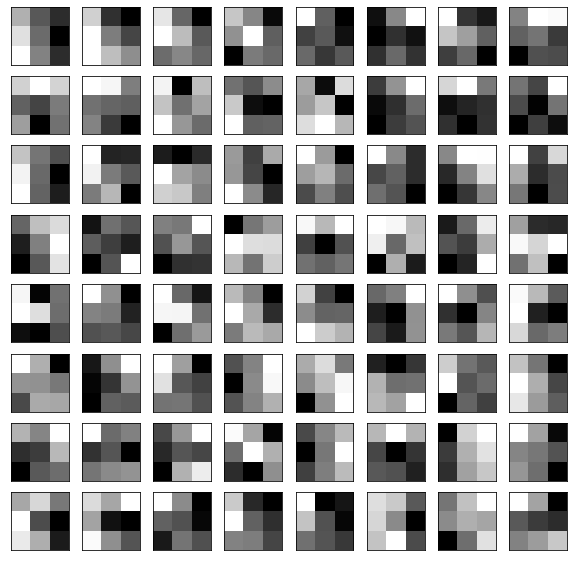

In [12]:
# cannot easily visualize filters lower down
# retrieve weights from the second hidden layer
filters = model_vgg.features[2].weight.cpu().detach().numpy()
# normalize filter values to 0-1  
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)   
square(filters[np.newaxis,0,:,:,:],8)

## **Dataset**

- working directory setting 

In [16]:
## G-drive mount하기
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [17]:
!ls 

sample_data  vgg16.pt


### **Load image**

In [14]:
from PIL import Image
from torchvision import transforms

In [15]:
# set test file path
gdrive_data = '/content/gdrive/MyDrive/Colab Notebooks/datasets/'
bird_file_path = gdrive_data + 'bird.jpg'
# load the image with the required shape
input_image = Image.open(bird_file_path)
plt.imshow(input_image)  

FileNotFoundError: ignored

In [ ]:
# prepare the image (e.g. scale pixel for the vgg)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
# expand dimensions 
input_batch = input_tensor.unsqueeze(0) # #(1,3,244,244)   

In [ ]:
p(input_batch)

[]:
Shape:torch.Size([1, 3, 224, 224])
Type: <class 'torch.Tensor'>
Values: tensor([[[[ 0.8618,  0.8789,  0.8789,  ...,  1.5468,  1.5297,  1.5468],
          [ 0.8961,  0.8961,  0.8961,  ...,  1.5982,  1.5810,  1.5639],
          [ 0.8961,  0.8961,  0.9132,  ...,  1.6153,  1.6153,  1.6153],
          ...,
          [ 0.5707,  0.5536,  0.5536,  ..., -0.4911, -0.5424, -0.5767],
          [ 0.4337,  0.4337,  0.4337,  ..., -0.5767, -0.7308, -0.7993],
          [ 0.1768,  0.1939,  0.2282,  ..., -0.6623, -0.7650, -0.9363]],

         [[ 1.7983,  1.8158,  1.8158,  ...,  2.1660,  2.1660,  2.1835],
          [ 1.8333,  1.8333,  1.8333,  ...,  2.1835,  2.1835,  2.2010],
          [ 1.8333,  1.8333,  1.8333,  ...,  2.2185,  2.2010,  2.2010],
          ...,
          [ 0.8880,  0.8704,  0.8704,  ..., -0.0924, -0.1275, -0.1625],
          [ 0.7304,  0.6954,  0.6954,  ..., -0.2325, -0.3200, -0.4076],
          [ 0.4328,  0.4328,  0.4153,  ..., -0.3200, -0.4601, -0.6702]],

         [[ 2.3437,  2.361

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.1007793 2.6051416


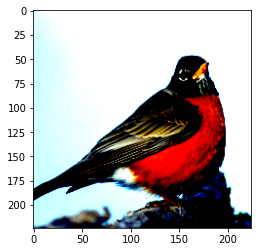

In [ ]:
#permute(1,2,0): (c,h,w)->(h,w,c)
plt.imshow(input_batch[0].permute(1, 2, 0))
print(np.min(input_batch.cpu().detach().numpy()),
      np.max(input_batch.cpu().detach().numpy()))  

## **첫번째 conv layer의 feature map 시각화**

In [ ]:
model_vgg.features[0].weight.shape

torch.Size([64, 3, 3, 3])

[] Shapetorch.Size([1, 64, 224, 224])
min[-12.57],max[12.69]


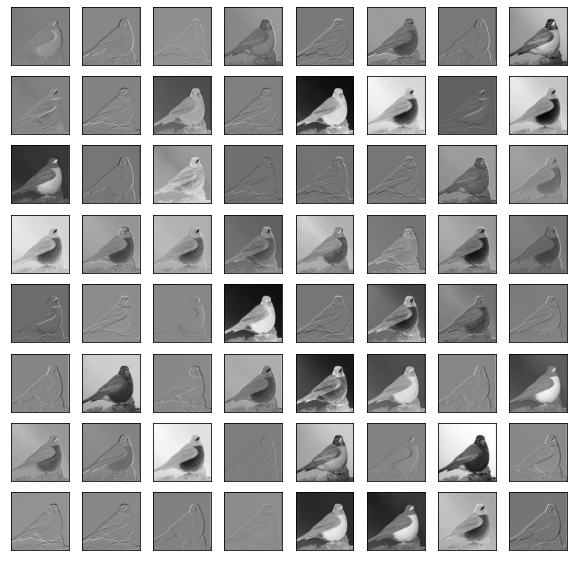

In [ ]:
## 준비한 img를 입력으로 넣고 추론 실행 
feature_maps = model_vgg.features[:1](input_batch.to(device))
ps(feature_maps)
# plot 64 feature maps 
square(feature_maps[0].cpu().detach().numpy(), 8)  

**두번째 conv layer의 feature map 시각화**


[] Shapetorch.Size([1, 64, 224, 224])
min[-29.92],max[23.26]


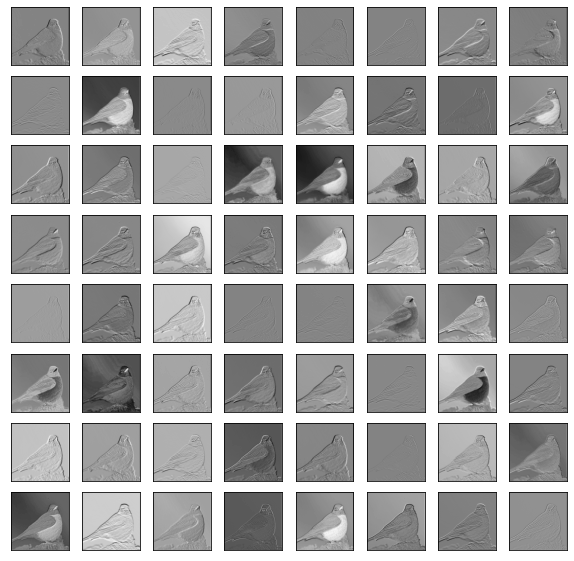

In [ ]:
## 준비한 img를 입력으로 넣고 추론 실행 
feature_maps = model_vgg.features[:3](input_batch.to(device))
ps(feature_maps)
# plot 64 feature maps 
square(feature_maps[0].cpu().detach().numpy(), 8)

## **VGG모델의 모든 conv layer Feature map 시각화 하기** 


In [ ]:
class VGGFeatureMap(nn.Module):
    def __init__(self, features):
        super(VGGFeatureMap, self).__init__()
        self.features = features
    def forward(self, x):
        out1 = self.features[:3](x)
        out2 = self.features[:8](x)
        out3 = self.features[:15](x)
        out4 = self.features[:22](x)
        out5 = self.features[:29](x)
        return out1, out2, out3, out4, out5

vggFeatureMap = VGGFeatureMap(model_vgg.features)
#summary(vggFeatureMap, input_size=(8, 3, 224, 224))

In [ ]:
fmap[0].shape

torch.Size([512, 14, 14])

[1 Block] Features : torch.Size([64, 224, 224])
min[-29.92],max[23.26]


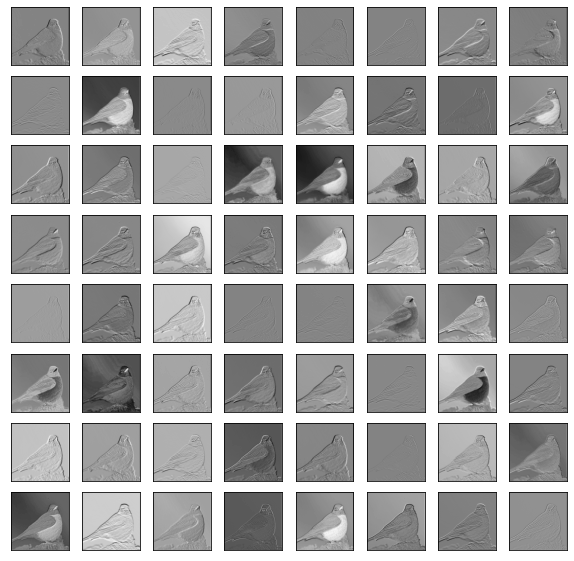

[2 Block] Features : torch.Size([128, 112, 112])
min[-62.99],max[52.36]


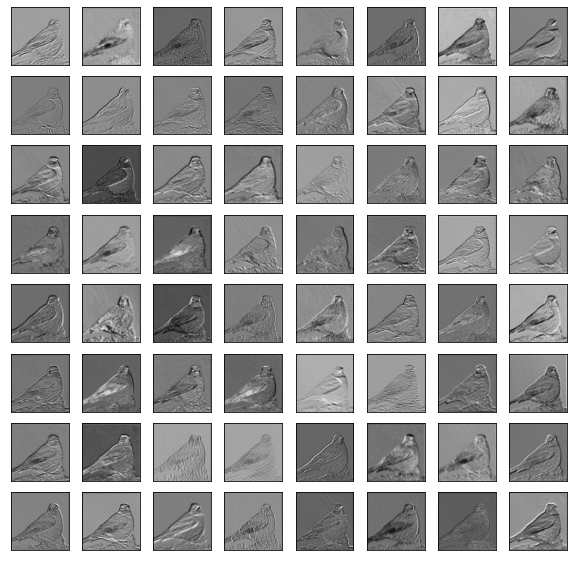

[3 Block] Features : torch.Size([256, 56, 56])
min[-95.88],max[82.48]


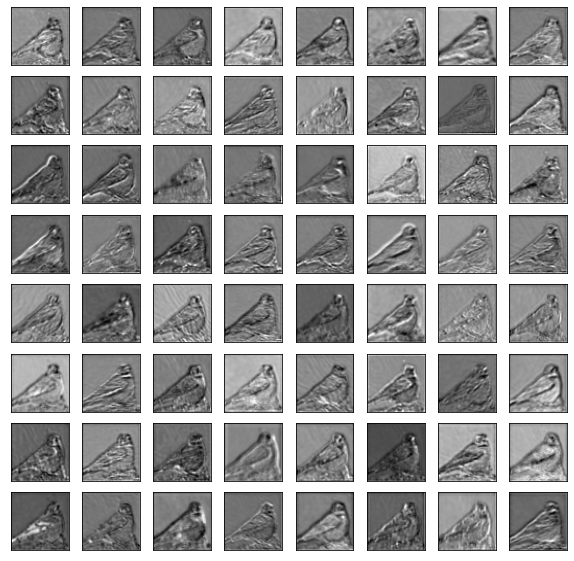

[4 Block] Features : torch.Size([512, 28, 28])
min[-64.99],max[63.06]


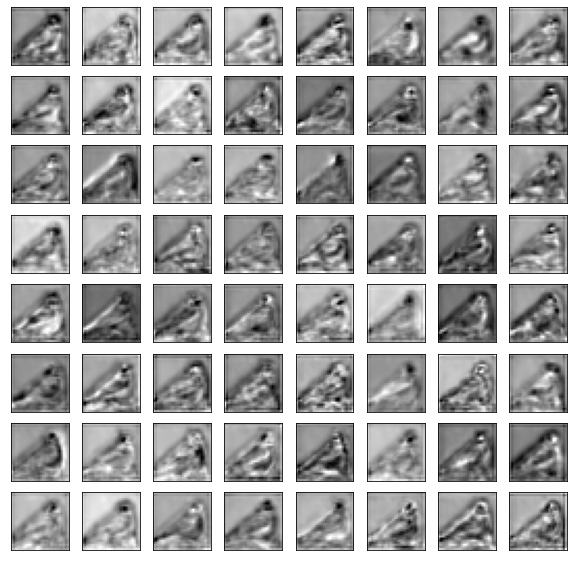

[5 Block] Features : torch.Size([512, 14, 14])
min[-49.02],max[58.34]


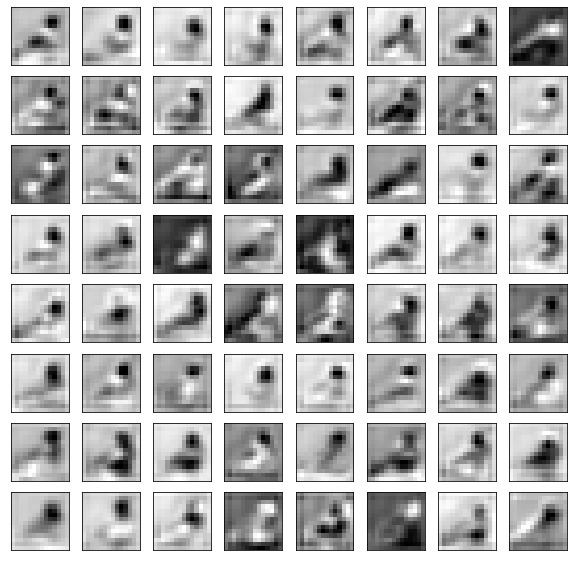

In [ ]:
## 모델에 image넣어 실행
feature_maps = vggFeatureMap(input_batch.to(device))
# plot the output from each block
for i, fmap in enumerate(feature_maps): 
    print(f'[{i+1} Block] Features :',fmap[0].shape)
    square(fmap[0].cpu().detach().numpy(), 8)  

## **실습 과제**

#### 과제 1  
##### -- 각 Conv Block에서 maxpooling layer의 출력들을 시각화 하자  

#### 과제 2 
##### 최종 Conv layer와, maxpooling layer를 통과한 feature map을 sum 하여   
시각화 하면 어떻게 보일까 생각해 보자
##### -- 실제 결과와 비교해 보자 

[5 Block] Features : torch.Size([512, 14, 14])  
min[0.00],max[58.34]  
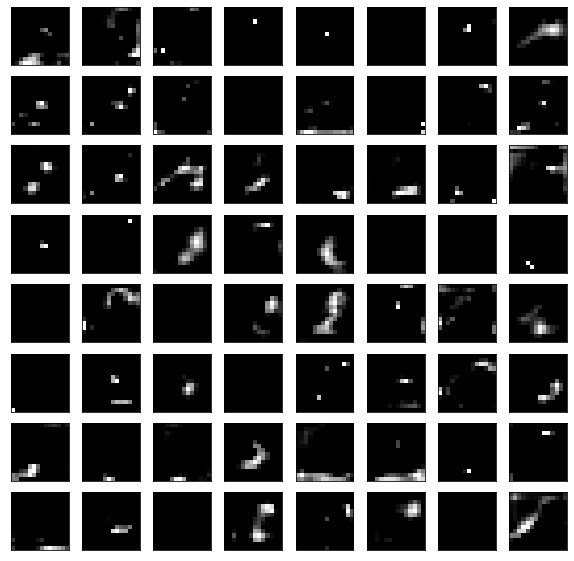

In [ ]:
ps(fmap)
fmap_sum = torch.mean(fmap[0], dim=0)
ps(fmap_sum)
plt.imshow(fmap_sum.cpu().detach().numpy())  

[5 Block] Features : torch.Size([512, 7, 7])  
min[0.00],max[58.34]  
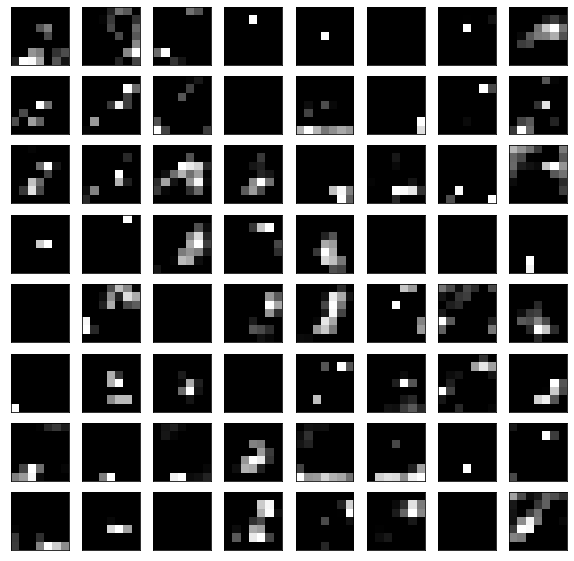